### import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### import dataset

In [2]:
data = pd.read_csv('SLR2.csv')
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [3]:
data.head()

,fertility rate,worker percent
0,3.71,28.33
1,3.59,28.72
2,3.48,29.18
3,3.37,29.67
4,3.27,30.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility rate  23 non-null     float64
 1   worker percent  23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [5]:
data.describe()

,fertility rate,worker percent
count,23.000000,23.000000
mean,2.711304,34.126957
std,0.526535,4.384630
min,2.060000,28.330000
25%,2.250000,30.840000
50%,2.600000,32.740000
75%,3.120000,37.195000
max,3.710000,44.040000


In [6]:
data.corr()

,fertility rate,worker percent
fertility rate,1.000000,-0.920882
worker percent,-0.920882,1.000000


### visualize the data

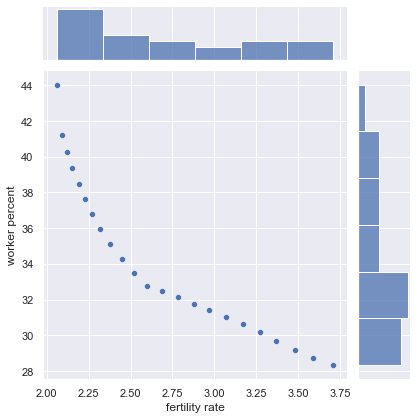

In [20]:
sns.jointplot(x = 'fertility rate',y='worker percent',data = data)

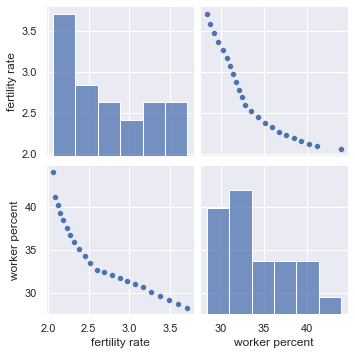

In [8]:
sns.pairplot(data)

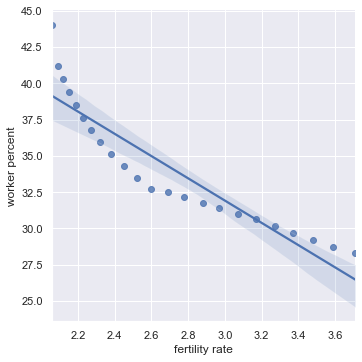

In [9]:
sns.lmplot(x='fertility rate',y='worker percent',data = data)

### spliting the data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [11]:
x_train.shape

(18, 1)

In [12]:
y_train.shape

(18,)

### training the model

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### predicting the test set

In [14]:
y_predict = reg.predict(x_test)
np.set_printoptions(precision=2)

In [15]:
print(y_predict.reshape(len(y_predict),1),'\n\n',y_test)

[[35.01]
 [34.35]
 [38.78]
 [36.64]
 [38.56]] 

 11    32.74
10    32.50
21    41.21
14    35.10
20    40.29
Name: worker percent, dtype: float64


Text(0, 0.5, 'worker percent')

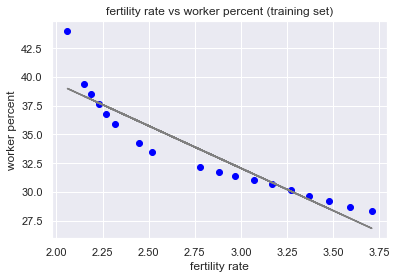

In [16]:
plt.scatter(x_train,y_train,color = 'blue')
plt.plot(x_train,reg.predict(x_train),color = 'grey')
plt.title('fertility rate vs worker percent (training set)')
plt.xlabel('fertility rate')
plt.ylabel('worker percent')

Text(0, 0.5, 'worker percent')

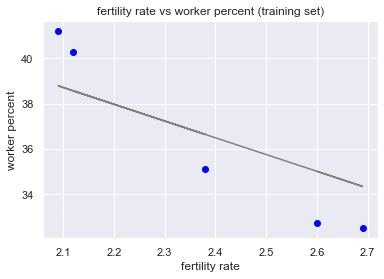

In [17]:
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_test,reg.predict(x_test),color = 'grey')
plt.title('fertility rate vs worker percent (test set)')
plt.xlabel('fertility rate')
plt.ylabel('worker percent')

### model coefficient and intercept

In [18]:
print('model coefficient : ',reg.coef_)
print('model intercept : ',reg.intercept_)

model coefficient :  [-7.38]
model intercept :  54.214483126327465


### predicting single value

In [19]:
worker_percent = reg.predict([[4]])
print(worker_percent)

[24.68]
